# Predicting Cat scores based on mock test data

<b> Dataset Description </b> 
<br><b>USER_ID</b> :  User id
<br><b>CAT_PERC</b> : Final CAT Percentile (Actual ) - this is what is to be predicted
<br><b>QA_PERC</b>              : Final CAT Quant percentile
<br><b>LRDI_PERC</b>           : Final CAT LRDI  percentile
<br><b>VA_PERC</b>                : Final CAT verbal percentile
<br><b>PREV_CAT_PERC</b>    : Last years CAT scor, 0= not taken cat or unknown
<br><b>PREV_QA_PERC</b>      : Last years CAT QA percentile
<br><b>PREV_LRDI_PERC</b>            : Last years CAT DI percentile
<br><b>PREV_VA_PERC</b>              : Last years CAT verbal percentile
<br><b>NMOCKS</b>              : No of Mocks taken in 2017
<br><b>BEST_MOCK</b>         : Highest percentile achieved
<br><b>TOP3_MOCK</b>          : Best of 3 percentile
<br><b>AVG_MOCK</b>             : All mock average percentile
<br><b>BEST_MOCK_QA</b>       -- same for Quant
<br><b>TOP3_MOCK_QA</b>          -- same for Quant
<br><b>AVG_MOCK_QA</b>               -- same for Quant
<br><b>BEST_MOCK_DI</b>            -- same for DI
<br><b>TOP3_MOCK_DI</b>             -- same for DI
<br><b>AVG_MOCK_DI</b>              -- same for DI
<br><b>BEST_MOCK_VA</b>          -- same for VA
<br><b>TOP3_MOCK_VA</b>           -- same for VA
<br><b>AVG_MOCK_VA</b>             -- same for VA
<br><b>PROC_PERC</b>                Avg Percentile of all PROCTORED tests
<br><b>PROC_QA</b>                  Avg Percentile in QA section of all PROCTORED tests
<br><b>PROC_DI</b>                  Avg Percentile in DI of all PROCTORED tests
<br><b>PROC_VA</b>                 Avg Percentile in VA of all PROCTORED tests
<br><b>DIFF_ATT</b>                 Percentage of all difficult qs attempted
<br><b>DIFF_ACC</b>                Accuracy of all difficult qs attempted
<br><b>TOP5_MOCK</b>            Best of 5 Mocks - will be 0 if no of proc < 5
<br><b>TOP8_MOCK</b>                Best of 8 Mocks - will be 0 if no of proc < 8
<br><b> NPROCS</b>      : Number of Proctored tests

## Parameters to be set

In [65]:
dataset_location = 'ml_trng_2017_2_3_overall.csv'

# Maximum allowed Difference between average of top 3 mocks and final cat percentile
# Total samples = 3513, for max_allowed_difference = 10 samples = 2000 and for 5 it is 1326
max_allowed_difference = 10

# If student has attempted less than min_NMOCKS_value then we will remove him/her from data because
# he hasnt given enough mocks for us to predic his final CAT Percentile
min_NMOCKS_value = 5

In [66]:
# Restore all the stored variables 
%store -r

## Data preprocessing

In [67]:
import pandas as pd

In [68]:
data = pd.read_csv(dataset_location)

In [69]:
data.shape

(3513, 15)

In [70]:
data.head()

,USER_ID,CAT_PERC,PREV_CAT_PERC,NMOCKS,BEST_MOCK,TOP3_MOCK,AVG_MOCK,PROC_PERC,DIFF_ATT,DIFF_ACC,TOP5_MOCK,TOP8_MOCK,NPROCS,EASY_ATT,EASY_ACC
0,2809628,81.53,NaN,19,86.32,78.76,49.75,56.37,0.52,0.13,74.49,68.98,9,0.55,0.36
1,2809643,90.30,70.0,16,88.00,82.52,69.58,67.96,0.41,0.16,80.85,79.24,13,0.57,0.45
2,2809688,90.53,82.0,18,96.51,93.42,81.08,83.48,0.58,0.21,91.35,88.83,6,0.67,0.51
3,2809701,98.66,87.0,20,95.53,93.43,74.50,77.59,0.46,0.19,89.31,85.10,15,0.58,0.45
4,2809732,72.96,70.0,7,44.33,41.51,30.52,0.00,0.41,0.12,36.10,NaN,0,0.43,0.25


In [71]:
def mod_difference(a,b):
    if(a>b):
        return (a-b)
    else:
        return (b-a)

Dropping those samples where difference between top 3 mocks and final cat percentile is more than 10.

In [72]:
for index, row in data.iterrows():
    if mod_difference(row['CAT_PERC'], row['TOP3_MOCK']) > max_allowed_difference:
        data.drop(index, inplace=True)

Dropping those samples where number of mocks attempted is less than 5 because the student has not given enough mocks for us to predict his percentile.

In [73]:
data.shape

(2000, 15)

In [74]:
for index, row in data.iterrows():
    if row['NMOCKS'] < min_NMOCKS_value:
        data.drop(index, inplace=True)

We will replace PREV_CAT_PERC with AVG_MOCK wherever its missing because correlation is 0.6996 and students average mock score would have been his/her previous year score. After replacement correlation of PREV_CAT_PERC with CAT_PERC increased to 0.87

In [75]:
%%time
for index, row in data.iterrows():
    if pd.isnull(row['PREV_CAT_PERC']):
        data['PREV_CAT_PERC'][index] = row['AVG_MOCK']

C:\Users\DELL PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Wall time: 49.1 s


In [76]:
data['DIFF_ATTX100'] = data.DIFF_ATT * 100
data['DIFF_ACCX100'] = data.DIFF_ACC * 100
data['EASY_ATTX100'] = data.EASY_ATT * 100
data['EASY_ACCX100'] = data.EASY_ACC * 100

In [77]:
data.head()

,USER_ID,CAT_PERC,PREV_CAT_PERC,NMOCKS,BEST_MOCK,TOP3_MOCK,AVG_MOCK,PROC_PERC,DIFF_ATT,DIFF_ACC,TOP5_MOCK,TOP8_MOCK,NPROCS,EASY_ATT,EASY_ACC,DIFF_ATTX100,DIFF_ACCX100,EASY_ATTX100,EASY_ACCX100
0,2809628,81.53,49.75,19,86.32,78.76,49.75,56.37,0.52,0.13,74.49,68.98,9,0.55,0.36,52.0,13.0,55.0,36.0
1,2809643,90.30,70.00,16,88.00,82.52,69.58,67.96,0.41,0.16,80.85,79.24,13,0.57,0.45,41.0,16.0,57.0,45.0
2,2809688,90.53,82.00,18,96.51,93.42,81.08,83.48,0.58,0.21,91.35,88.83,6,0.67,0.51,58.0,21.0,67.0,51.0
3,2809701,98.66,87.00,20,95.53,93.43,74.50,77.59,0.46,0.19,89.31,85.10,15,0.58,0.45,46.0,19.0,58.0,45.0
5,2809762,98.53,85.42,18,99.79,97.14,85.42,85.42,0.48,0.22,95.71,94.38,18,0.64,0.54,48.0,22.0,64.0,54.0


In [78]:
data.shape

(1886, 19)

In [79]:
%store data

Stored 'data' (DataFrame)


## All samples

In [88]:
data.head()

,USER_ID,CAT_PERC,PREV_CAT_PERC,NMOCKS,BEST_MOCK,TOP3_MOCK,AVG_MOCK,PROC_PERC,DIFF_ATT,DIFF_ACC,TOP5_MOCK,TOP8_MOCK,NPROCS,EASY_ATT,EASY_ACC,DIFF_ATTX100,DIFF_ACCX100,EASY_ATTX100,EASY_ACCX100
0,2809628,81.53,49.75,19,86.32,78.76,49.75,56.37,0.52,0.13,74.49,68.98,9,0.55,0.36,52.0,13.0,55.0,36.0
1,2809643,90.30,70.00,16,88.00,82.52,69.58,67.96,0.41,0.16,80.85,79.24,13,0.57,0.45,41.0,16.0,57.0,45.0
2,2809688,90.53,82.00,18,96.51,93.42,81.08,83.48,0.58,0.21,91.35,88.83,6,0.67,0.51,58.0,21.0,67.0,51.0
3,2809701,98.66,87.00,20,95.53,93.43,74.50,77.59,0.46,0.19,89.31,85.10,15,0.58,0.45,46.0,19.0,58.0,45.0
5,2809762,98.53,85.42,18,99.79,97.14,85.42,85.42,0.48,0.22,95.71,94.38,18,0.64,0.54,48.0,22.0,64.0,54.0


In [89]:
X_allSamples = data.iloc[:,2:-3]
Y_allSamples = data.iloc[:,1]

In [90]:
X_allSamples.shape

(1886, 14)

In [91]:
Y_allSamples.shape

(1886,)

<b>Train-Test Split : </b> We will have a 70-30 random train-test split on data and 4 fold cross validation on train data for hyperparameter tuning and avoiding overfitting.  

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X_allSamples, Y_allSamples, test_size=0.3, random_state=3)

In [94]:
X_train.head()

,PREV_CAT_PERC,NMOCKS,BEST_MOCK,TOP3_MOCK,AVG_MOCK,PROC_PERC,DIFF_ATT,DIFF_ACC,TOP5_MOCK,TOP8_MOCK,NPROCS,EASY_ATT,EASY_ACC,DIFF_ATTX100
2003,68.49,17,95.18,87.42,68.49,70.14,0.43,0.14,84.19,79.68,12,0.61,0.45,43.0
1374,33.87,6,72.20,44.86,33.87,30.76,0.53,0.11,37.03,NaN,1,0.53,0.28,53.0
1452,77.50,19,98.65,94.56,77.50,77.00,0.57,0.23,91.81,89.56,11,0.64,0.48,57.0
346,73.96,16,93.32,89.56,73.96,73.96,0.37,0.15,87.09,83.50,16,0.61,0.49,37.0
1362,76.37,10,89.52,87.00,76.37,77.77,0.42,0.18,83.90,78.73,7,0.52,0.45,42.0


In [95]:
X_test.shape

(566, 14)

In [96]:
# Leaving out "TOP8_MOCK" because of too many null values
X_train = X_train.drop(axis=1, labels=["DIFF_ATT","EASY_ATT","TOP8_MOCK"])
X_test = X_test.drop(axis=1, labels=["DIFF_ATT","EASY_ATT","TOP8_MOCK"])

In [97]:
# Printing missing values
X_train.apply(lambda x: sum(x.isnull()),axis=0) 

PREV_CAT_PERC    0
NMOCKS           0
BEST_MOCK        0
TOP3_MOCK        0
AVG_MOCK         0
PROC_PERC        0
DIFF_ACC         0
TOP5_MOCK        0
NPROCS           0
EASY_ACC         0
DIFF_ATTX100     0
dtype: int64

In [98]:
# Printing missing values
X_test.apply(lambda x: sum(x.isnull()),axis=0) 

PREV_CAT_PERC    0
NMOCKS           0
BEST_MOCK        0
TOP3_MOCK        0
AVG_MOCK         0
PROC_PERC        0
DIFF_ACC         0
TOP5_MOCK        0
NPROCS           0
EASY_ACC         0
DIFF_ATTX100     0
dtype: int64

No missing values found

## Importing all Regressors

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PassiveAggressiveRegressor

# Robust regression is interested in fitting a regression model in the presence of corrupt data: 
# either outliers, or error in the model.
# Scikit-learn provides 3 robust regression estimators: RANSAC, Theil Sen and HuberRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

# TO BE WORKED ON : Polynomial regression: extending linear models with basis functions

from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.svm import NuSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

In [167]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt

In [168]:
Regressors = []

In [169]:
# 0
Linear = LinearRegression()
Regressors.append(Linear)

# 1
XGBR = XGBRegressor()
Regressors.append(XGBR)

# 2
Lars = Lars()
Regressors.append(Lars)

# 3
RandomForest = RandomForestRegressor()
Regressors.append(RandomForest)


# 4
KernelRidge = KernelRidge()
Regressors.append(KernelRidge)

# 5
LGBMR = LGBMRegressor()
Regressors.append(LGBMR)

# 6
ExtraTrees = ExtraTreesRegressor()
Regressors.append(ExtraTrees)

# 7
Huber = HuberRegressor()
Regressors.append(Huber)

# 8


# 9 


# 10


# 11


# 12


# 13


# 14
GradientBoosting = GradientBoostingRegressor()
Regressors.append(GradientBoosting)

# 15
RANSAC = RANSACRegressor()
Regressors.append(RANSAC)

# 16
ExtraTree = ExtraTreeRegressor()
Regressors.append(ExtraTree)

# 17

# 18
AdaBoost = AdaBoostRegressor()
Regressors.append(AdaBoost)

# 19
Bagging = BaggingRegressor()
Regressors.append(Bagging)

# 20
KNeighbors = KNeighborsRegressor()
Regressors.append(KNeighbors)

# 21
PassiveAggressive = PassiveAggressiveRegressor()
Regressors.append(PassiveAggressive)

LinearSVR = LinearSVR()
Regressors.append(LinearSVR)

Ridge = Ridge()
Regressors.append(Ridge)


Lasso = Lasso()
Regressors.append(Lasso)


ElasticNet = ElasticNet()
Regressors.append(ElasticNet)


BayesianRidge = BayesianRidge()
Regressors.append(BayesianRidge)


TheilSen = TheilSenRegressor()
Regressors.append(TheilSen)


DecisionTree = DecisionTreeRegressor()
Regressors.append(DecisionTree)

# 22
MLPR = MLPRegressor()
Regressors.append(MLPR)

# 23
GaussianProcess = GaussianProcessRegressor()
Regressors.append(GaussianProcess)

# 24
LassoLars = LassoLars()
Regressors.append(LassoLars)

# 25
SGD = SGDRegressor()
Regressors.append(SGD)

# 26
SVR = SVR()
Regressors.append(SVR)

# 27
NuSVR = NuSVR()
Regressors.append(NuSVR)



In [170]:
len(Regressors)

28

In [171]:
predictions = []

In [172]:
%%time
for regressor in Regressors:
    regressor.fit(X_train,Y_train)
    prediction = regressor.predict(X_test)
    predictions.append(prediction)

C:\Users\DELL PC\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


Wall time: 4.05 s


In [173]:
len(prediction)

566

In [174]:
RMS = []

In [175]:
for prediction in predictions:
    msscore = mean_squared_error(Y_test, prediction)
    rms = sqrt(msscore)
    RMS.append(rms)

In [176]:
len(RMS)

28

In [272]:
X_test.to_csv('X_test.csv')

In [177]:
for i, j in enumerate(RMS):
    print(i,j)

0 4.2039290554180155
1 4.1670070631957
2 4.20392905541801
3 4.507520626646831
4 4.219548436281928
5 4.44129160071842
6 4.441302082814533
7 4.358688931859551
8 4.237355103373596
9 4.960287306196002
10 5.778950731298054
11 4.433119272227475
12 4.389657046497564
13 4.692651827394067
14 7.100682525239875
15 4.453100589917714
16 4.224025398699453
17 4.28293946625073
18 4.289576278364059
19 4.282418635415653
20 4.427297969627779
21 5.907427139318811
22 4.288198028052241
23 87.23234200577043
24 17.916437279359158
25 9553137717176.908
26 19.078576981843558
27 18.14443626968445


In [178]:
RMS.sort()

In [179]:
RMS

[4.1670070631957,
 4.20392905541801,
 4.2039290554180155,
 4.219548436281928,
 4.224025398699453,
 4.237355103373596,
 4.282418635415653,
 4.28293946625073,
 4.288198028052241,
 4.289576278364059,
 4.358688931859551,
 4.389657046497564,
 4.427297969627779,
 4.433119272227475,
 4.44129160071842,
 4.441302082814533,
 4.453100589917714,
 4.507520626646831,
 4.692651827394067,
 4.960287306196002,
 5.778950731298054,
 5.907427139318811,
 7.100682525239875,
 17.916437279359158,
 18.14443626968445,
 19.078576981843558,
 87.23234200577043,
 9553137717176.908]

#### Analysing outputs and making ensembles

In [269]:
X_test

,PREV_CAT_PERC,NMOCKS,BEST_MOCK,TOP3_MOCK,AVG_MOCK,PROC_PERC,DIFF_ACC,TOP5_MOCK,NPROCS,EASY_ACC,DIFF_ATTX100
0,92.00,16,96.84,94.95,84.23,84.36,0.22,93.69,14,0.53,53.0
1,70.00,20,86.48,84.78,68.95,71.06,0.13,83.56,18,0.43,33.0
2,47.08,20,70.34,67.14,47.08,47.08,0.12,63.96,20,0.34,54.0
3,97.00,10,99.98,99.97,99.52,99.39,0.45,99.94,7,0.79,73.0
4,70.00,15,94.16,86.00,71.10,71.10,0.16,83.99,15,0.43,37.0
5,87.61,20,96.95,96.48,87.61,93.94,0.21,95.93,5,0.56,57.0
6,97.00,20,95.80,94.99,86.50,82.23,0.20,94.15,5,0.54,49.0
7,97.00,18,99.89,99.86,97.32,98.44,0.31,99.75,12,0.70,60.0
8,90.45,8,99.69,96.87,90.45,90.56,0.28,95.01,7,0.56,58.0
9,70.00,19,92.71,91.20,75.89,75.55,0.19,89.70,5,0.46,50.0


In [180]:
Scores = pd.DataFrame({'actual': Y_test})
for index, prediction in enumerate(predictions):
    column = pd.DataFrame({index: prediction})
    Scores = Scores.join(column.set_index(Scores.index))

In [181]:
Scores.iloc[:,:13].head(20)

,actual,0,1,2,3,4,5,6,7,8,9,10,11
2414,97.09,96.624178,96.526703,96.624178,96.922,96.589707,96.753164,97.020,96.618044,96.523789,96.412376,96.84,95.688090
1536,91.94,86.834756,86.728943,86.834756,87.382,85.916398,83.777020,87.358,86.037909,86.565721,87.553306,92.66,86.485325
2368,70.47,67.320951,68.066849,67.320951,66.619,67.325791,65.460121,67.616,67.142823,67.699213,70.408848,68.05,66.867396
158,99.77,94.370349,97.385063,94.370349,96.052,98.221489,98.957176,96.939,100.472855,97.320067,92.401098,98.93,96.387635
3318,91.20,88.909348,88.517784,88.909348,88.742,88.444170,90.709770,89.301,88.910375,88.531038,88.585717,95.41,87.325814
3111,99.35,98.505864,97.488663,98.505864,96.776,98.470024,97.378320,97.200,97.989232,97.586386,99.239787,98.92,95.339034
2809,96.33,97.946515,97.850342,97.946515,98.406,97.684712,98.542061,97.690,97.475050,97.827028,98.171408,97.92,95.005050
266,99.82,97.859984,98.992073,97.859984,99.588,99.727137,99.354708,99.476,100.417360,98.985619,98.347753,99.69,96.387635
2216,97.65,98.863846,98.077118,98.863846,97.584,98.711388,97.249620,96.566,98.948147,97.839067,98.074656,95.27,96.387635
2852,97.68,93.609853,93.906326,93.609853,96.849,93.185093,95.786235,93.852,92.924491,94.378554,93.531767,92.83,91.947248


In [239]:
# numRegs - Number of regressors from index 0 in ensemble
# 28 regressors are being used currently
# mse - list of mean squared error values

mse = []
# stores list of predictions by ensembles
ensemble_preds = []

for numRegs in range(1,24):
    
    ensemble = []

    for j in range(len(predictions[0])):
        s = 0
        for i in range(numRegs):
            s = s + predictions[i][j]
        ensemble.append(s/(numRegs))
        
    ensemble_preds.append(ensemble)
    msscore = mean_squared_error(Y_test, ensemble)
    rms = sqrt(msscore)
    mse.append(rms)

In [240]:
for i,j in enumerate(mse):
    print(i,j)

0 4.2039290554180155
1 4.091722500841808
2 4.108522785792882
3 4.137858457982497
4 4.119430940097761
5 4.1256830043271675
6 4.130605443148953
7 4.125670514941927
8 4.122558617804862
9 4.144557321395713
10 4.150716017050583
11 4.1284440493805405
12 4.128117278602268
13 4.136047774226851
14 4.157444167469254
15 4.158873051222603
16 4.155320724370652
17 4.154362918531322
18 4.154908706003222
19 4.155401757129342
20 4.161813966086807
21 4.169955483254268
22 4.164050990831703


In [256]:
ensemble_preds[1][:30]

[96.57544050509406,
 86.78184960246725,
 67.69389999435248,
 95.87770606655445,
 88.7135661828186,
 97.99726360621948,
 97.89842821304728,
 98.4260283815702,
 98.470482086219,
 93.75808947150011,
 92.24758318377707,
 89.24586671346205,
 98.33643319532412,
 98.45024890638781,
 85.849427646211,
 88.93232919228296,
 92.63859867911509,
 96.66469730845067,
 55.472203692308526,
 97.10336212526016,
 88.65809963357461,
 69.48223313749689,
 96.96614874529463,
 88.17278347327691,
 84.23044734151286,
 98.77616870565178,
 95.03433047340036,
 91.13525814054677,
 81.58053027108056,
 84.8670383642936]

In [265]:
top3 = X_test['TOP3_MOCK'][:30]

In [257]:
# best performing enseble predicted scores
ensemble_30 = ensemble_preds[1][:30]


In [266]:
Results = pd.DataFrame({'Actual_CAT_Score': Y_test})
preds = pd.DataFrame({'PredictedByModel': ensemble_30})
Results = Results.join(preds.set_index(Results.index))
Top3 = pd.DataFrame({'TOP3_Mock': top3})
Results = Results.join(Top3.set_index(Results.index))

In [267]:
Results

,Actual_CAT_Score,PredictedByModel,TOP3_Mock
2414,97.09,96.575441,94.95
1536,91.94,86.781850,84.78
2368,70.47,67.693900,67.14
158,99.77,95.877706,99.97
3318,91.20,88.713566,86.00
3111,99.35,97.997264,96.48
2809,96.33,97.898428,94.99
266,99.82,98.426028,99.86
2216,97.65,98.470482,96.87
2852,97.68,93.758089,91.20


In [268]:
Results.to_csv('Comparing_Results.csv')

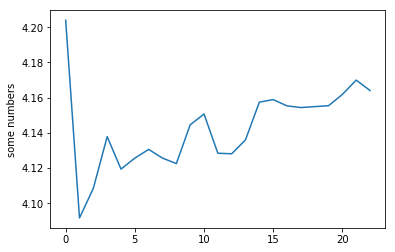

In [185]:
# After swapping RANSAC and Random Forrest models
import matplotlib.pyplot as plt

plt.plot(mse)
plt.ylabel('some numbers')
plt.show()

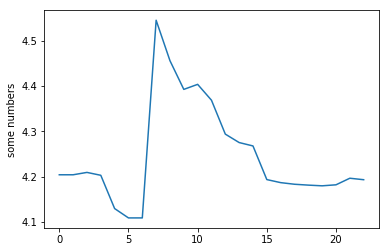

In [165]:
# here we can see RANSAC Model earleier present at index 10 destroyed ensembling model
import matplotlib.pyplot as plt
plt.plot(mse)
plt.ylabel('some numbers')
plt.show()

# Findings

Average of Linear Regression, XGboost gives the lowest RMS 4.0917

## Experiment

In [244]:
Y_test = Y_test.head(30)

In [231]:
X_test.shape

(569, 11)

In [245]:
X_test = X_test.head(30)

In [246]:
# Value of a student with avg mock score 99.52
#PREV_CAT_PERC	NMOCKS	BEST_MOCK	TOP3_MOCK	AVG_MOCK	PROC_PERC	DIFF_ACC	TOP5_MOCK	NPROCS	EASY_ACC	DIFF_ATTX100
# 97.00	10	99.98	99.97	99.52	99.39	0.45	99.94	7	0.79	73.0

student1 = pd.DataFrame([[95.50, 10, 99.00, 98.69, 98.00, 99.50, 0.4, 97.79, 7, 0.75,73.0]],                      
                      columns=['PREV_CAT_PERC','NMOCKS','BEST_MOCK','TOP3_MOCK','AVG_MOCK','PROC_PERC','DIFF_ACC','TOP5_MOCK','NPROCS','EASY_ACC', 'DIFF_ATTX100'])       

In [247]:
prediction_experiment = []

In [248]:
X_train.shape

(1320, 11)

In [249]:
# Appending our experimental student 
X_test = X_test.append(student1, ignore_index=True)
X_test.tail(5)

,PREV_CAT_PERC,NMOCKS,BEST_MOCK,TOP3_MOCK,AVG_MOCK,PROC_PERC,DIFF_ACC,TOP5_MOCK,NPROCS,EASY_ACC,DIFF_ATTX100
26,82.0,18,97.27,93.78,78.52,78.93,0.21,91.51,8,0.50,56.0
27,82.0,19,89.88,88.23,76.47,76.47,0.15,86.67,19,0.48,39.0
28,70.0,17,88.07,79.98,48.41,59.67,0.09,70.97,8,0.33,38.0
29,67.6,13,85.15,81.40,67.60,68.10,0.17,79.32,7,0.46,50.0
30,95.5,10,99.00,98.69,98.00,99.50,0.40,97.79,7,0.75,73.0


In [250]:
# taking only XGBRegressor and Linear Regressor
for i in range(2):
    Regressors[i].fit(X_train,Y_train)
    prediction = Regressors[i].predict(X_test)
    prediction_experiment.append(prediction)

In [253]:
X_test['TOP3_MOCK']

0     94.95
1     84.78
2     67.14
3     99.97
4     86.00
5     96.48
6     94.99
7     99.86
8     96.87
9     91.20
10    93.24
11    86.20
12    98.87
13    98.42
14    81.81
15    84.66
16    90.11
17    95.25
18    51.48
19    95.29
20    84.16
21    64.69
22    94.05
23    87.80
24    84.32
25    98.42
26    93.78
27    88.23
28    79.98
29    81.40
30    98.69
Name: TOP3_MOCK, dtype: float64

In [251]:
prediction_experiment

[array([96.62417813, 86.83475633, 67.32095123, 94.37034896, 88.90934825,
        98.50586449, 97.94651463, 97.8599837 , 98.86384625, 93.60985265,
        94.52637059, 89.44414126, 98.62805133, 98.80333747, 85.30620087,
        87.97184375, 92.15222025, 96.26955728, 54.64241306, 98.13462647,
        88.0519323 , 67.99453372, 97.99298932, 88.56863518, 85.15975485,
        99.82612586, 95.43536779, 90.26936424, 82.22733709, 83.35993122,
        94.73803728]),
 array([96.5267  , 86.72894 , 68.06685 , 97.38506 , 88.517784, 97.48866 ,
        97.85034 , 98.99207 , 98.07712 , 93.90633 , 89.968796, 89.04759 ,
        98.044815, 98.09716 , 86.392654, 89.892815, 93.12498 , 97.05984 ,
        56.301994, 96.0721  , 89.26427 , 70.96993 , 95.93931 , 87.77693 ,
        83.30114 , 97.72621 , 94.63329 , 92.00115 , 80.93372 , 86.374146,
        98.40218 ], dtype=float32)]

In [291]:
data.head()

,USER_ID,CAT_PERC,PREV_CAT_PERC,NMOCKS,BEST_MOCK,TOP3_MOCK,AVG_MOCK,PROC_PERC,DIFF_ATT,DIFF_ACC,TOP5_MOCK,TOP8_MOCK,NPROCS,EASY_ATT,EASY_ACC,DIFF_ATTX100,DIFF_ACCX100,EASY_ATTX100,EASY_ACCX100
0,2809628,81.53,49.75,19,86.32,78.76,49.75,56.37,0.52,0.13,74.49,68.98,9,0.55,0.36,52.0,13.0,55.0,36.0
1,2809643,90.30,70.00,16,88.00,82.52,69.58,67.96,0.41,0.16,80.85,79.24,13,0.57,0.45,41.0,16.0,57.0,45.0
2,2809688,90.53,82.00,18,96.51,93.42,81.08,83.48,0.58,0.21,91.35,88.83,6,0.67,0.51,58.0,21.0,67.0,51.0
3,2809701,98.66,87.00,20,95.53,93.43,74.50,77.59,0.46,0.19,89.31,85.10,15,0.58,0.45,46.0,19.0,58.0,45.0
5,2809762,98.53,85.42,18,99.79,97.14,85.42,85.42,0.48,0.22,95.71,94.38,18,0.64,0.54,48.0,22.0,64.0,54.0


<b> Please Run the cells from here</b>

In [322]:
obj = {}

# Edit these arguments and run below cells to get mean of each extent
bucket_size = 2
start = 80
stop = 100


def make_buckets(data,bucket_size,start,stop):
    for i in range(start,stop,bucket_size):
        obj[i] = []
        for index,row in data.iterrows():
            if(row['TOP3_MOCK'] >= i and row['TOP3_MOCK'] < (i+bucket_size)):
                #obj[i].append(row['TOP3_MOCK'])
                obj[i].append(row['CAT_PERC'])

In [323]:
make_buckets(data,bucket_size,start,stop)

In [324]:
import seaborn as sns
from scipy.stats import norm

Distribution Plots of Cat_PERC when TOP3_Mock in Range 80 - 82
Mean of Bucket : 84.38305084745762  Standard Deviation :  5.321099750684681


C:\Users\DELL PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


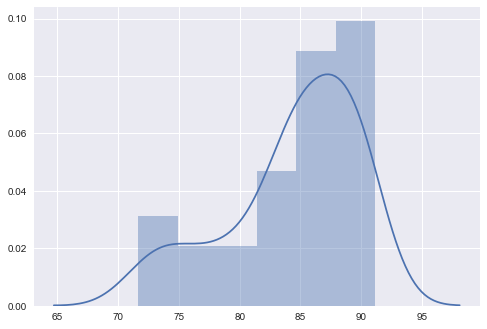

C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Distribution Plots of Cat_PERC when TOP3_Mock in Range 82 - 84
Mean of Bucket : 86.09048387096774  Standard Deviation :  4.753660873616539


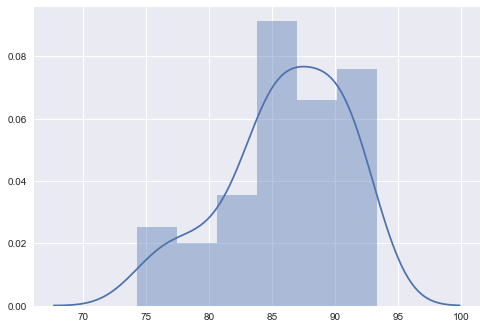

C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Distribution Plots of Cat_PERC when TOP3_Mock in Range 84 - 86
Mean of Bucket : 88.14279569892471  Standard Deviation :  4.744736612015556


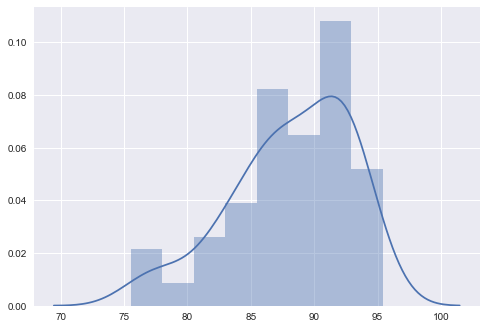

C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Distribution Plots of Cat_PERC when TOP3_Mock in Range 86 - 88
Mean of Bucket : 90.406  Standard Deviation :  4.98077985861652


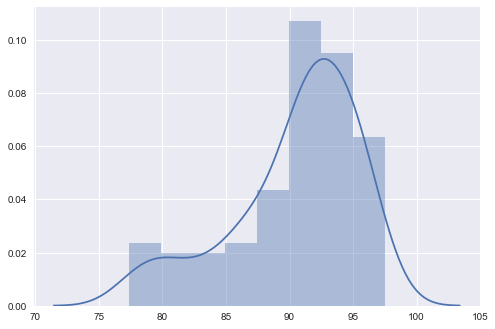

C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Distribution Plots of Cat_PERC when TOP3_Mock in Range 88 - 90
Mean of Bucket : 92.63214285714285  Standard Deviation :  4.176502601410879


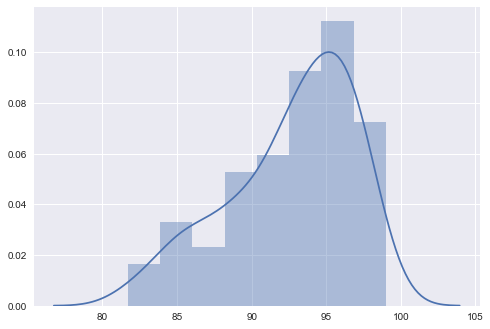

C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Distribution Plots of Cat_PERC when TOP3_Mock in Range 90 - 92
Mean of Bucket : 94.36616883116884  Standard Deviation :  3.4878518670982452


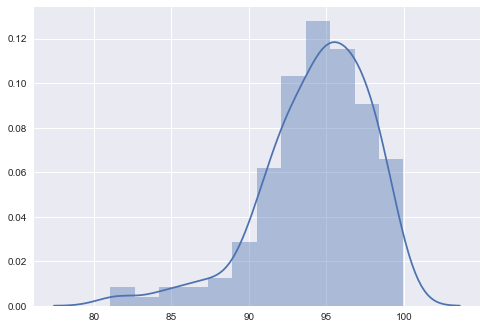

C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Distribution Plots of Cat_PERC when TOP3_Mock in Range 92 - 94
Mean of Bucket : 94.49208092485549  Standard Deviation :  4.00475645732278


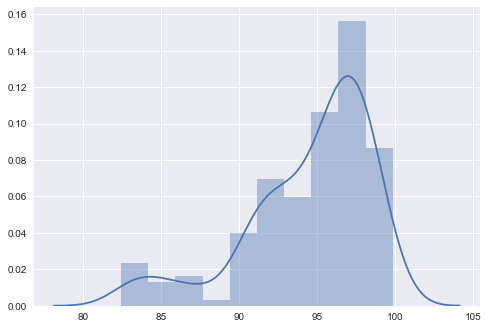

Distribution Plots of Cat_PERC when TOP3_Mock in Range 94 - 96
Mean of Bucket : 96.32229050279331  Standard Deviation :  3.0132878541792913


C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


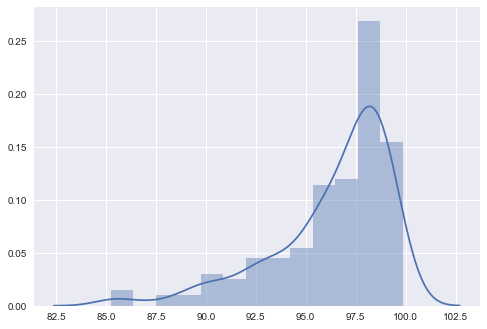

C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Distribution Plots of Cat_PERC when TOP3_Mock in Range 96 - 98
Mean of Bucket : 97.39391534391535  Standard Deviation :  2.313651575298443


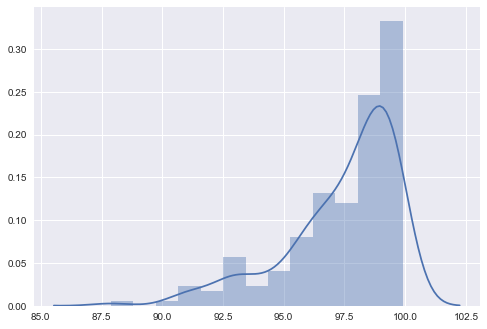

Distribution Plots of Cat_PERC when TOP3_Mock in Range 98 - 100
Mean of Bucket : 98.42970833333334  Standard Deviation :  1.9009599324895186


C:\Users\DELL PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


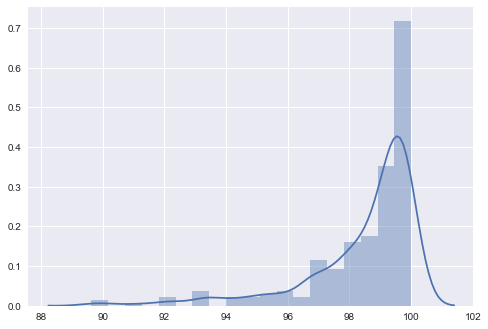

In [325]:
for i in obj:
    sns.distplot(obj[i])
    (mu, sigma) = norm.fit(obj[i])
    print('Distribution Plots of Cat_PERC when TOP3_Mock in Range',i,'-',i+bucket_size,end='\n')
    print('Mean of Bucket :',mu,' Standard Deviation : ',sigma)
    plt.show()
    plt.close()